<a href="https://colab.research.google.com/github/CJYJas/Heart-Failure-Prediction-Classification-/blob/main/Heat_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction with Machine Learning

The goal of this project is to build and evaluate machine learning models that can predict the presence of heart disease in patients based on clinical and demographic data.


In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [15]:
#upload data
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (2).csv


In [16]:
#load data
df = pd.read_csv('heart.csv')

#data info
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  1

In [24]:
#define X anf y
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

#one-hot encode object columns
X = pd.get_dummies(X, columns = X.select_dtypes(include = 'object').columns)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
#model training

#logistic regression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

#KNN
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train_scaled, y_train)
knc_pred = knc.predict(X_test_scaled)

#random_forest
rfc = RandomForestClassifier(n_estimators= 100, max_depth= 10, random_state=42)
rfc.fit(X_train_scaled, y_train)
rfc_pred = rfc.predict(X_test_scaled)

Accuracy Score for LogisticRegression : 0.8532608695652174
Classification report 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



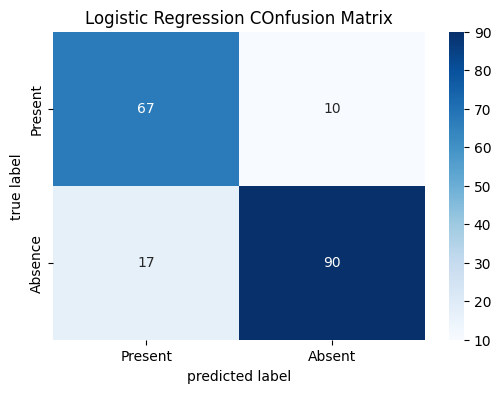

Accuracy Score for KNeighborsClassifier : 0.8586956521739131
Classification report 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



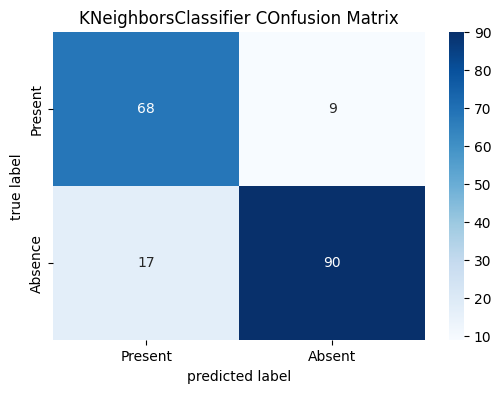

Accuracy Score for RandomFOrestClassifier : 0.8913043478260869
Classification report 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.91      0.90      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



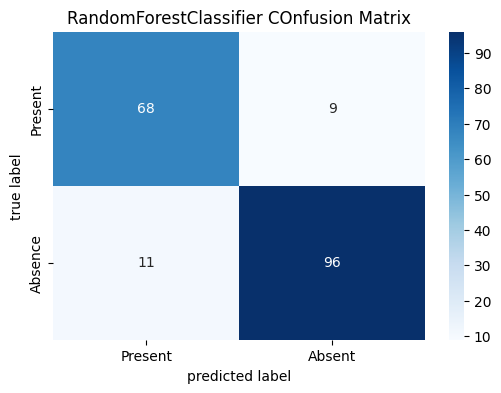

In [64]:
#model performance & evaluation

#LR performance
print("Accuracy Score for LogisticRegression :", accuracy_score(y_test, lr_pred))
print("Classification report \n", classification_report(y_test, lr_pred))
cm_lr = confusion_matrix(y_test,lr_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm_lr, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Present', 'Absent'], yticklabels = ['Present', 'Absence'])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Logistic Regression COnfusion Matrix')
plt.show()

#KNN performance
print("Accuracy Score for KNeighborsClassifier :", accuracy_score(y_test, knc_pred))
print("Classification report \n", classification_report(y_test, knc_pred))
cm_knc = confusion_matrix(y_test,knc_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm_knc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Present', 'Absent'], yticklabels = ['Present', 'Absence'])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('KNeighborsClassifier COnfusion Matrix')
plt.show()

#RF performance
print("Accuracy Score for RandomFOrestClassifier :", accuracy_score(y_test, rfc_pred))
print("Classification report \n", classification_report(y_test, rfc_pred))
cm_rfc = confusion_matrix(y_test,rfc_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Present', 'Absent'], yticklabels = ['Present', 'Absence'])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('RandomForestClassifier COnfusion Matrix')
plt.show()

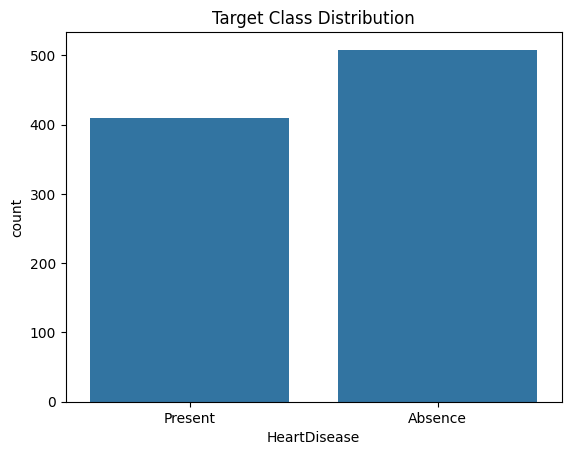

HeartDisease
1    508
0    410
Name: count, dtype: int64


In [57]:
#Target balance
sns.countplot(x = 'HeartDisease', data = df)
plt.xticks([0,1], ['Present', 'Absence'])
plt.title('Target Class Distribution')
plt.show()
print(df['HeartDisease'].value_counts())

Model                          F1 Score            
LogisticRegression             0.870               
KNeighborsClassifier           0.874               
RandomForestClassifier         0.906               


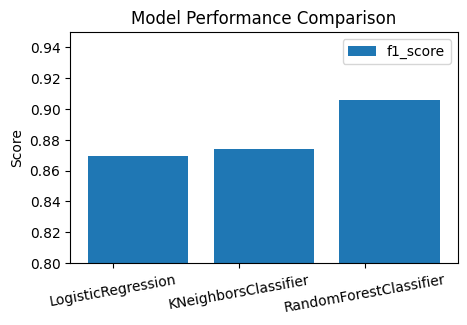

In [65]:
#model comparison
model_names = ['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier']

f1_scores = [
    f1_score(y_test, lr_pred),
    f1_score(y_test, knc_pred),
    f1_score(y_test, rfc_pred)
]

print(f"{'Model':<30} {'F1 Score':<20}")
for i in range(len(model_names)):
    print(f"{model_names[i]:<30} {f1_scores[i]:<20.3f}")

plt.figure(figsize=(5,3))
x = range(len(model_names))
plt.bar([i + 0.4 for i in x], f1_scores, width = 0.8, label = 'f1_score', align = 'center')
plt.xticks([i + 0.2 for i in x], model_names, rotation = 10)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.ylim(0.80, 0.95)
plt.legend()
plt.show()

✅ Final Summary & Conclusion
In this project, we aimed to classify presence of heart disease using various machine learning models.

🔍 Models Used:
Logistic Regression
K-Nearest Neighbors (KNN)
Random Forest

⚙️ Preprocessing:
We use StandardScaler to scale the data as the data is in a wide range.We also use one-hot encode to turn object data into a string

🏆 Best Performing Model:
Model: Random Forest
F1 Score: 0.91

This project demonstrates a full ML pipeline — from data loading to model evaluation — and gives us a solid baseline for future improvement.